In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv("C:/Users/User/Desktop/Python/train.csv")
test_df = pd.read_csv("C:/Users/User/Desktop/Python/test.csv")


In [3]:
pd.set_option('display.max_columns',None)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
342/(549+342)

0.3838383838383838

<AxesSubplot:xlabel='Survived', ylabel='count'>

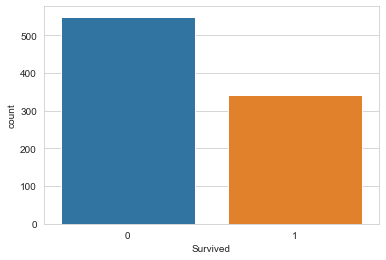

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

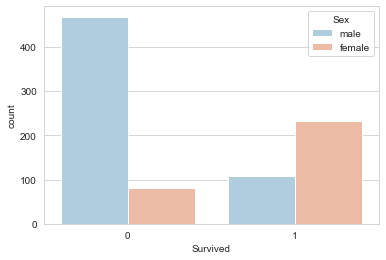

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

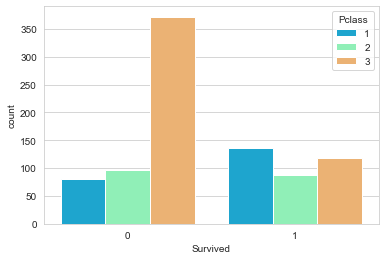

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

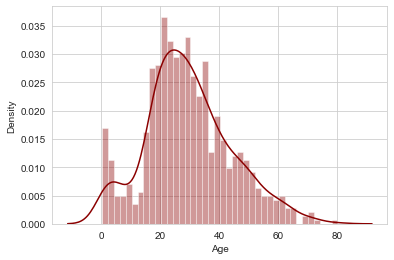

In [10]:
sns.distplot(df['Age'].dropna(),color='darkred',bins=40)

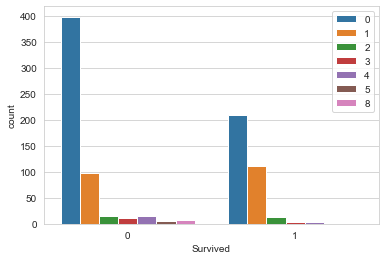

In [11]:
sns.countplot(x='Survived',hue='SibSp',data=df)
plt.legend(loc='upper right')

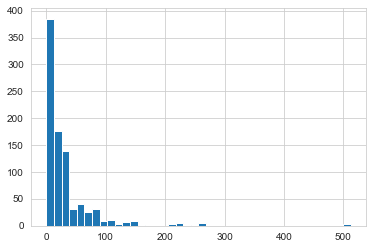

In [12]:
plt.hist(df['Fare'].dropna(),bins=40);

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

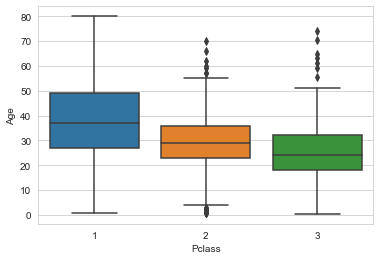

In [13]:
sns.set_style('whitegrid')
sns.boxplot(x='Pclass',y='Age',data=df)

In [14]:
df[df['Pclass']==1]['Age'].median()

37.0

In [15]:
def impute(cols):
    Age=cols[0] 
    Pclass=cols[1]
    if pd.isnull(Age):

        if Pclass == 1:
            return df[df['Pclass']==1]['Age'].median()

        elif Pclass == 2:
            return df[df['Pclass']==1]['Age'].median()
        else:
            return df[df['Pclass']==1]['Age'].median()

    else:
        return Age

In [16]:
df['Age']=df[['Age','Pclass']].apply(impute,axis=1)


<AxesSubplot:>

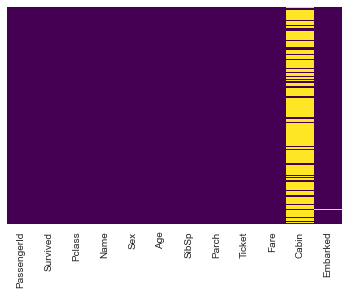

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
df.drop('Cabin',axis=1,inplace=True)

In [19]:
df=df.dropna()
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [21]:

embark = pd.get_dummies(df['Embarked'],drop_first=True)
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [22]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [23]:
df=pd.concat([df,embark,sex],axis=1)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,0,3,22.0,1,0,7.2500,0,1,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,1


In [25]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [26]:
from sklearn.model_selection import train_test_split 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, test_size=0.30, 
                                                    random_state=100,stratify=y)

In [28]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred=model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
accuracy=confusion_matrix(y_test,y_pred)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       165
           1       0.71      0.66      0.68       102

    accuracy                           0.77       267
   macro avg       0.76      0.75      0.75       267
weighted avg       0.77      0.77      0.77       267



In [33]:
from sklearn import svm
model=svm.SVC(kernel='linear')


In [34]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       165
           1       0.74      0.67      0.70       102

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.77       267
weighted avg       0.78      0.78      0.78       267



In [37]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
kernel=['linear', 'poly', 'rbf', 'sigmoid']
C=[0.001, 0.01, 0.1, 1, 10, 100]
gamma=[0.001, 0.01, 0.1, 1, 10, 100]

random_grid = {'kernel': kernel,
               'C': C,
               'gamma': gamma
               }
print(random_grid)

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [38]:
model=svm.SVC()
rf_randomcv=RandomizedSearchCV(estimator=model,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=50,n_jobs=1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
